# Working with Burgundy weather Data set


### Reading the dataset

#### Importing Libraries for read, work and plot the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### The following dataset has been obtained by the nasa portal https://power.larc.nasa.gov/data-access-viewer/

In [2]:
dataset = pd.read_csv('BurgundyWeather.csv')
dataset.head(10)

,LAT,LON,YEAR,MO,DY,PRECTOT,T2M_MIN,T2M_MAX
0,47.00001,4.50001,1981,1,2,2.94,-0.84,2.03
1,47.00001,4.50001,1981,1,3,11.78,2.08,6.35
2,47.00001,4.50001,1981,1,4,11.85,-2.30,6.01
3,47.00001,4.50001,1981,1,5,0.48,-2.56,0.95
4,47.00001,4.50001,1981,1,6,4.58,-2.43,3.43
5,47.00001,4.50001,1981,1,7,0.37,-4.01,-0.08
6,47.00001,4.50001,1981,1,8,0.09,-4.95,0.83
7,47.00001,4.50001,1981,1,9,0.65,-5.32,0.91
8,47.00001,4.50001,1981,1,10,8.96,-0.80,0.66
9,47.00001,4.50001,1981,1,11,2.13,-4.84,0.54


##### Renaming columns for better understanding and for and easy way to work with the dataset

In [3]:
dataset = dataset.rename(columns={'LAT':'latitude','LON':'longitude','YEAR':'year', 'MO':'month', 'DY':'day','PRECTOT':'precipitation', 'T2M_MAX':'max_temp', 'T2M_MIN':'min_temp'})
print(dataset.shape)
dataset

(14243, 8)


,latitude,longitude,year,month,day,precipitation,min_temp,max_temp
0,47.00001,4.50001,1981,1,2,2.94,-0.84,2.03
1,47.00001,4.50001,1981,1,3,11.78,2.08,6.35
2,47.00001,4.50001,1981,1,4,11.85,-2.30,6.01
3,47.00001,4.50001,1981,1,5,0.48,-2.56,0.95
4,47.00001,4.50001,1981,1,6,4.58,-2.43,3.43
...,...,...,...,...,...,...,...,...
14238,47.00001,4.50001,2019,12,27,12.20,5.14,8.84
14239,47.00001,4.50001,2019,12,28,0.01,-1.85,5.90
14240,47.00001,4.50001,2019,12,29,0.00,-3.63,3.65
14241,47.00001,4.50001,2019,12,30,0.00,-3.29,3.68


##### Changing latitude and longitude for Region with value of Burgundy

In [5]:
dataset['region'] = dataset['latitude'] + dataset['longitude']
dataset.drop(['latitude', 'longitude'], axis=1, inplace=True)
dataset = dataset.replace(dataset['region'].values, 'Burgundy', regex=True,)
dataset


,year,month,day,precipitation,min_temp,max_temp,region
0,1981,1,2,2.94,-0.84,2.03,Burgundy
1,1981,1,3,11.78,2.08,6.35,Burgundy
2,1981,1,4,11.85,-2.30,6.01,Burgundy
3,1981,1,5,0.48,-2.56,0.95,Burgundy
4,1981,1,6,4.58,-2.43,3.43,Burgundy
...,...,...,...,...,...,...,...
14238,2019,12,27,12.20,5.14,8.84,Burgundy
14239,2019,12,28,0.01,-1.85,5.90,Burgundy
14240,2019,12,29,0.00,-3.63,3.65,Burgundy
14241,2019,12,30,0.00,-3.29,3.68,Burgundy


### Feature Engineering 

Firstly let's explore the dataset

In [6]:
dataset.describe()

,year,month,day,precipitation,min_temp,max_temp
count,14243.000000,14243.000000,14243.000000,14243.000000,14243.000000,14243.000000
mean,2000.001334,6.523555,15.729973,2.259395,5.526902,14.403423
std,11.253731,3.448569,8.799549,3.947959,6.377117,8.110847
min,1981.000000,1.000000,1.000000,0.000000,-17.710000,-12.090000
25%,1990.000000,4.000000,8.000000,0.050000,0.630000,7.870000
50%,2000.000000,7.000000,16.000000,0.480000,5.730000,14.660000
75%,2010.000000,10.000000,23.000000,2.750000,10.540000,20.800000
max,2019.000000,12.000000,31.000000,62.330000,23.340000,39.300000


##### Checkin for null or na values

In [7]:
dataset.isna().any()

year             False
month            False
day              False
precipitation    False
min_temp         False
max_temp         False
region           False
dtype: bool

In [8]:
dataset.isnull().any()

year             False
month            False
day              False
precipitation    False
min_temp         False
max_temp         False
region           False
dtype: bool

### Set up a Datetime

The algorithm that we will try in this document works with *time series*, thus let's create a feature date under the time series type by using year, month and day columns 

In [9]:
dataset['date'] = pd.to_datetime(dataset[['year', 'month', 'day']])
cols = list(dataset.columns)
cols = [cols[-1]] + cols[:-1]

dataset = dataset[cols]

dataset

,date,year,month,day,precipitation,min_temp,max_temp,region
0,1981-01-02,1981,1,2,2.94,-0.84,2.03,Burgundy
1,1981-01-03,1981,1,3,11.78,2.08,6.35,Burgundy
2,1981-01-04,1981,1,4,11.85,-2.30,6.01,Burgundy
3,1981-01-05,1981,1,5,0.48,-2.56,0.95,Burgundy
4,1981-01-06,1981,1,6,4.58,-2.43,3.43,Burgundy
...,...,...,...,...,...,...,...,...
14238,2019-12-27,2019,12,27,12.20,5.14,8.84,Burgundy
14239,2019-12-28,2019,12,28,0.01,-1.85,5.90,Burgundy
14240,2019-12-29,2019,12,29,0.00,-3.63,3.65,Burgundy
14241,2019-12-30,2019,12,30,0.00,-3.29,3.68,Burgundy


#### Create and Average Temperature feature

As we want to predict the the ASGT (Average Season Growing Temperature) we want to work the average temperatures, therefore let's create a avg_temp feature, this is the average temperature per each day

In [10]:
col = dataset.loc[:, ('max_temp','min_temp')]
dataset['avg_temp'] = col.mean(axis=1)
dataset

,date,year,month,day,precipitation,min_temp,max_temp,region,avg_temp
0,1981-01-02,1981,1,2,2.94,-0.84,2.03,Burgundy,0.595
1,1981-01-03,1981,1,3,11.78,2.08,6.35,Burgundy,4.215
2,1981-01-04,1981,1,4,11.85,-2.30,6.01,Burgundy,1.855
3,1981-01-05,1981,1,5,0.48,-2.56,0.95,Burgundy,-0.805
4,1981-01-06,1981,1,6,4.58,-2.43,3.43,Burgundy,0.500
...,...,...,...,...,...,...,...,...,...
14238,2019-12-27,2019,12,27,12.20,5.14,8.84,Burgundy,6.990
14239,2019-12-28,2019,12,28,0.01,-1.85,5.90,Burgundy,2.025
14240,2019-12-29,2019,12,29,0.00,-3.63,3.65,Burgundy,0.010
14241,2019-12-30,2019,12,30,0.00,-3.29,3.68,Burgundy,0.195


### Dropping unnecesary columns 
- We will drop year, month and day columns as we have extracted that information to create or date column. 
- Drooping latitud and longitude as they are always the same values because we are talking about ame place, Burgundy
- Dropping precipitation as we are working with average temperture and Datetime
- Dropping min_temp and max_temp as we already got the average

In [11]:
#dataset.drop(['latitude','longitude','precipitation','year','month','day'], axis='columns', inplace=True)
dataset.drop(['precipitation','year','month','day','min_temp','max_temp'], axis='columns', inplace=True)

dataset

,date,region,avg_temp
0,1981-01-02,Burgundy,0.595
1,1981-01-03,Burgundy,4.215
2,1981-01-04,Burgundy,1.855
3,1981-01-05,Burgundy,-0.805
4,1981-01-06,Burgundy,0.500
...,...,...,...
14238,2019-12-27,Burgundy,6.990
14239,2019-12-28,Burgundy,2.025
14240,2019-12-29,Burgundy,0.010
14241,2019-12-30,Burgundy,0.195


### Grouping by average per month with DateTime  monthly frequency

The following block of code will group by the average temperature of each month in our data. ARIMA model works better when index is set as datetime with a given frequency, thus, we also make our index equals to the date feature and give it a monthly frequency

In [14]:
dataset = dataset.groupby([dataset.date.dt.year, dataset.date.dt.month], as_index=False).agg(
     {'date':'first','avg_temp':'mean'})


dataset.date = pd.date_range('1981-01-02', '2020-01-01', freq='M' )
dataset.index = pd.to_datetime(dataset.date)

dataset.drop('date', axis=1, inplace=True)
dataset.index.freq = 'M'
dataset.head(10)

,avg_temp
date,
1981-01-31,-0.885333
1981-02-28,0.183929
1981-03-31,7.622903
1981-04-30,9.290000
1981-05-31,11.935323
1981-06-30,14.613667
1981-07-31,16.652581
1981-08-31,17.355484
1981-09-30,14.929500


### Looking for Stationarity

Stationarity indicates that our data behaves similar with the passing of time, or is non-seasonal, it is the property of the data that means that variance and autocorrelation structure do not change over time.

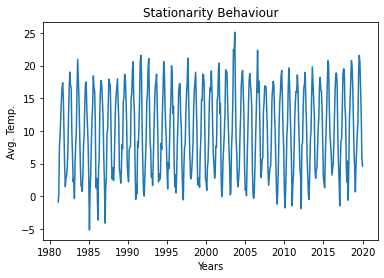

In [15]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Stationarity Behaviour')
ax1.plot(dataset.index, 'avg_temp', data = dataset);

In the previos plot, we do see how our data behaves in similar way with the passing of the time.

Two common tool to corroborate Stationarity are the *Augmented Dickey-Fuller Test (ADF)* and the *Moving Average (Rolling Mean)*

#### Moving Average
Used in time series to smooth short term and it high lights long term trends and we use the pandas.Rolling class to  calculate and plot this trend. A moving average is a technical indicator that combines values over a set period of time, and divides them by the number of data collected to give a trend line.

#### ADF
It tests whether or not a root unit is present in a time series, basically there are two hypotesis, 
* Null hypotesis. We have a unit root and therefore our data is seasonal
* Alternative hypotesis. We have a Stationarity data
A key factor here is that what is called *P-Value* has to be *P-Value <= 0.05*

The following function will help us to prove those concepts

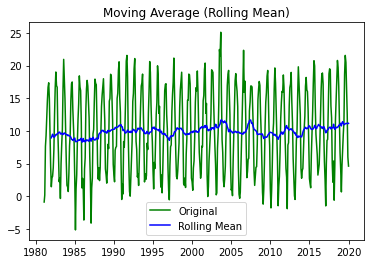

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.1776568612169265, 0.021314965170404425, 14, 453, {'1%': -3.444868194858831, '5%': -2.867941416548597, '10%': -2.5701797149735146}, 1823.038558348903)
df_output: 
 ADF-Test                        -3.177657
P-value                          0.021315
#Lags Used                      14.000000
Number of Observations Used    453.000000
dtype: float64
ADF-Test                        -3.177657
P-value                          0.021315
#Lags Used                      14.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64


In [16]:
from statsmodels.tsa.stattools import adfuller
def stationarity_check(ts):
    
    roll_mean = ts.rolling(center=False, window=12).mean()
    
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Moving Average (Rolling Mean)')
    plt.show(block=False)
    
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['ADF-Test','P-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

stationarity_check(dataset.avg_temp)

##### Autocorrelation is a term that refers to the phenomenon of Plot to show how well the average temperature values are compared to previous values.
Describes the autocorrelation of one observation with another at a previous time step.

A serial correlation, also known as an autocorrelation, is determined using values from the same sequence at previous times.
##### To see if there is any hidden information in the residual that can be modeled by the next lag, use partial autocorrelation.

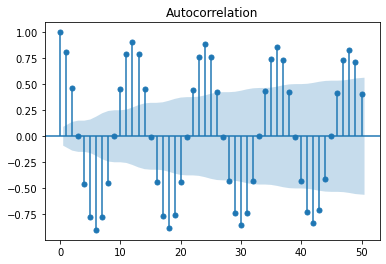

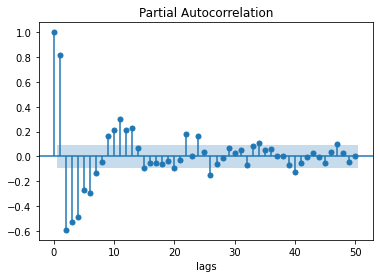

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(dataset['avg_temp'], lags=50)
plot_pacf(dataset['avg_temp'], lags=50)
plt.xlabel('lags')
plt.show()

##### Now that we corroborated that we have Stationarity data we can apply ARIMA model

## ARIMA Model

In this part of the project we are attempting to perform a time series analysis to forecast the ASGT in the region of Burgundy. It is needed that in the data used, the data points are linked to a time.

ARIMA stands for autoregressive integrated moving average, and it's a predictive analysis model that uses time series data to better explain the data set or forecast future patterns.

*Autoregressive Integrated Moving Average* 
* Auto regressive. This means predicting the next data point looking a previous data points using a mathematical formula similar to linear regresion. Represented as "p"
* Integration. Takes differences of the time series, substracts the previous value from each value to make data more stationarity. Represented as "d"
* Moving Averga. Performs calculations based on noise in the data along with the data’s slope. Represented as "q"

Combine together creates the ARIMA model and provide the amount of past data to put in our equetion *order=(p,d,q)*

### Selecting the model
Now we can continue applying the ARIMA model. For that from the pmdarima we will import auto_arima. This function will provide to us the order values

In [18]:
from pmdarima import auto_arima

In [19]:
stepwise_fit = auto_arima(dataset['avg_temp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  468
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -948.280
Date:                Thu, 06 May 2021   AIC                           1908.560
Time:                        19:51:48   BIC                           1933.451
Sample:                             0   HQIC                          1918.355
                                - 468                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.6501      0.025    106.689      0.000       2.601       2.699
ar.L1          1.7308      0.001   2018.569      0.000       1.729       1.732
ar.L2         -0.9986      0.001  -1368.852      0.000      -1.000      -0.997
ma.L1         -1.6521      0.019    -88.413      0.000      -1.689      -1.616
ma.L2          0.9349      0.020     46.155      0.000       0.895       0.975
sigma2         3.1966      0.184     17.408      0.000       2.837       3.556
===================================================================================
Ljung-Box (L1) (Q):                  11.41   Jarque-Bera (JB):                12.11
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.06
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Thank to the auto_arima function we could ge our order equetion(2,0,2) to fit in our ARIMA model

In [20]:
from statsmodels.tsa.arima_model import ARIMA

### Split data into train and test set

Next we do a train-test split taking everything but 47 observations for taining which represents 90% of the dataset the rest 10% is for testing. This decision is made due to weather it is always hard to forecast.  

In [21]:
print(dataset.shape)
train=dataset.iloc[:-47]
test=dataset.iloc[-47:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(468, 1)
(421, 1) (47, 1)
avg_temp    3.987586
Name: 2016-02-29 00:00:00, dtype: float64 avg_temp    4.610323
Name: 2019-12-31 00:00:00, dtype: float64


##### Plotting how the results of the model fit in the actual data

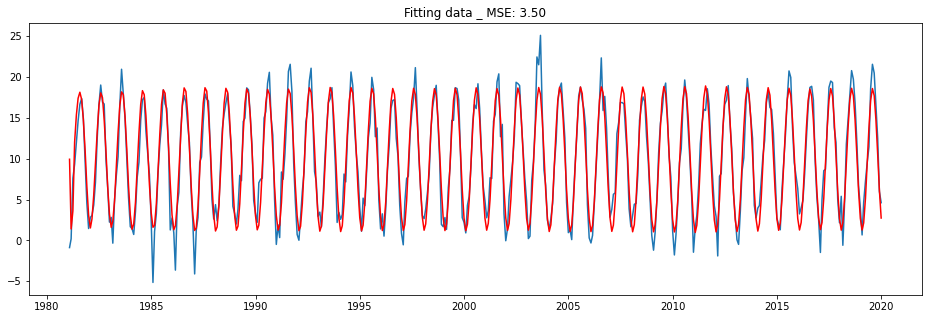

In [22]:
model = ARIMA(dataset.avg_temp, order=(2,0,2))  
results = model.fit()

plt.figure(figsize=(16,5))
plt.plot(dataset['avg_temp'])
plt.plot(results.fittedvalues, color='red')
#results.fittedvalues.plot(label = 'Fitted Values', legend=True)
#dataset['avg_temp'].plot(legend=True)

plt.title('Fitting data _ MSE: %.2f'% (((results.fittedvalues-dataset.avg_temp)**2).mean()))
plt.show()



##### Mean Square Error MSE
MSE is the sum of squared distances between our target variable and predicted values.
In our previous plot we can appreciate how the model fit in our data avoiding peaks with a MSE
of 3.50

##### Predicting  our model and compare against test set

The comparison between the average temperatures shows us a margin of error of approximately 0.75 °. we can plot the behavior of the prediction against the test

Test average Temperature 10.872386038523045
Prediction average Temperature  10.123466870873163


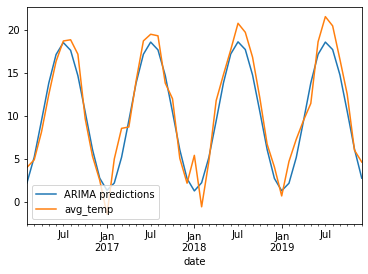

In [23]:
start=len(train)
end= len(train)+len(test)-1
pred = results.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['avg_temp'].plot(legend=True)
print(f'Test average Temperature {test["avg_temp"].mean()}')
print(f'Prediction average Temperature  {pred.mean()}')

##### Analyse accuracy
In the previous graph it seems the model behaves in a more constant way, let's analyse the accurecy of this representation


In [24]:
from sklearn import metrics
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['avg_temp'], pred)
mae = metrics.mean_absolute_error(test['avg_temp'], pred)
rmse= sqrt(metrics.mean_squared_error(test['avg_temp'],pred))


print(f'Mean Absolute Error {mae}')
print(f'Root Mean Squared Error {rmse}')
print(f'Mean Absolute Percentage Error {np.around(mape, decimals=2)}%')

Mean Absolute Error 1.5104417392601095
Root Mean Squared Error 1.7900423815330864
Mean Absolute Percentage Error 31.67%


### Our ARIMA model worked with a MAPE of 31.67%. This means that 31.67% of the predictions against test were wrong with values of  10.872° on the Test average Temperature and   10.123° Prediction average Temperature

### Making future predictions

We say in previous chapters that we would like to forcast the ASGT in ten years.

### Make prediction for the next 10 years

In [25]:
predictions = results.predict('01/31/2020', '12/01/2031')

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'Avg Temp'})
predictions['Date'] = predictions.index
predictions

,Avg Temp,Date
2020-01-31,1.289408,2020-01-31
2020-02-29,2.148622,2020-02-29
2020-03-31,5.092393,2020-03-31
2020-04-30,9.331590,2020-04-30
2020-05-31,13.729833,2020-05-31
...,...,...
2031-08-31,17.636472,2031-08-31
2031-09-30,14.641051,2031-09-30
2031-10-31,10.381457,2031-10-31
2031-11-30,5.999538,2031-11-30


### Creating a 2031 dataset

In [26]:
df_2031 = predictions[predictions.Date.dt.year == 2031]
df_2031

,Avg Temp,Date
2031-01-31,1.285423,2031-01-31
2031-02-28,2.210699,2031-02-28
2031-03-31,5.203892,2031-03-31
2031-04-30,9.462622,2031-04-30
2031-05-31,13.845272,2031-05-31
2031-06-30,17.177017,2031-06-30
2031-07-31,18.564745,2031-07-31
2031-08-31,17.636472,2031-08-31
2031-09-30,14.641051,2031-09-30
2031-10-31,10.381457,2031-10-31


### Eliminate months that do not belong to the ASGT

In [27]:
jan = df_2031[df_2031.Date.dt.month == 1].index
feb = df_2031[df_2031.Date.dt.month == 2].index
mar = df_2031[df_2031.Date.dt.month == 3].index
nov = df_2031[df_2031.Date.dt.month == 11].index
dic = df_2031[df_2031.Date.dt.month == 12].index

df_2031.drop(jan, inplace=True)
df_2031.drop(feb, inplace=True)
df_2031.drop(mar, inplace=True)
df_2031.drop(nov, inplace=True)
df_2031.drop(dic, inplace=True)

df_2031_asgt = df_2031

df_2031_asgt

,Avg Temp,Date
2031-04-30,9.462622,2031-04-30
2031-05-31,13.845272,2031-05-31
2031-06-30,17.177017,2031-06-30
2031-07-31,18.564745,2031-07-31
2031-08-31,17.636472,2031-08-31
2031-09-30,14.641051,2031-09-30
2031-10-31,10.381457,2031-10-31


Avarage Season Growing Tempeture 2031 Avg Temp    14.529805
dtype: float64


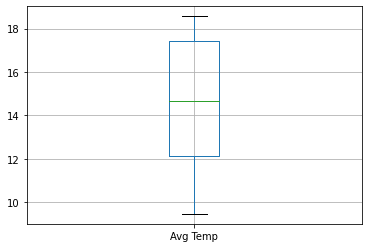

In [28]:
print(f'Avarage Season Growing Tempeture 2031 {df_2031_asgt.mean()}')
df_2031.boxplot(column=['Avg Temp'])
plt.show()

In [29]:
dataset['date'] = dataset.index
dataset

,avg_temp,date
date,,
1981-01-31,-0.885333,1981-01-31
1981-02-28,0.183929,1981-02-28
1981-03-31,7.622903,1981-03-31
1981-04-30,9.290000,1981-04-30
1981-05-31,11.935323,1981-05-31
...,...,...
2019-08-31,20.475000,2019-08-31
2019-09-30,16.570833,2019-09-30
2019-10-31,12.519677,2019-10-31


### Calculating the ASGT of the year 2000

According to our reserch this was the last best year for Burgundy

In [30]:
df_2000 = dataset[dataset.date.dt.year == 2000]

df_2000

,avg_temp,date
date,,
2000-01-31,0.913710,2000-01-31
2000-02-29,4.297069,2000-02-29
2000-03-31,5.397903,2000-03-31
2000-04-30,8.969667,2000-04-30
2000-05-31,14.356935,2000-05-31
2000-06-30,16.605333,2000-06-30
2000-07-31,16.125161,2000-07-31
2000-08-31,19.164355,2000-08-31
2000-09-30,16.122833,2000-09-30


In [31]:
jan = df_2000[df_2000.date.dt.month == 1].index
feb = df_2000[df_2000.date.dt.month == 2].index
mar = df_2000[df_2000.date.dt.month == 3].index
nov = df_2000[df_2000.date.dt.month == 11].index
dic = df_2000[df_2000.date.dt.month == 12].index

df_2000.drop(jan, inplace=True)
df_2000.drop(feb, inplace=True)
df_2000.drop(mar, inplace=True)
df_2000.drop(nov, inplace=True)
df_2000.drop(dic, inplace=True)

df_2000_asgt = df_2000

df_2000_asgt

,avg_temp,date
date,,
2000-04-30,8.969667,2000-04-30
2000-05-31,14.356935,2000-05-31
2000-06-30,16.605333,2000-06-30
2000-07-31,16.125161,2000-07-31
2000-08-31,19.164355,2000-08-31
2000-09-30,16.122833,2000-09-30
2000-10-31,10.802258,2000-10-31


##### Compere the prediction for 2030 against 2000, which was the best year for Burgundy

Avarage Season Growing Tempeture 2000 avg_temp    14.592363
dtype: float64
Avarage Season Growing Tempeture 2031 Avg Temp    14.529805
dtype: float64


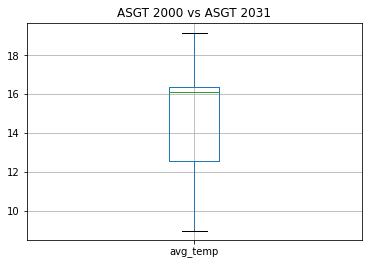

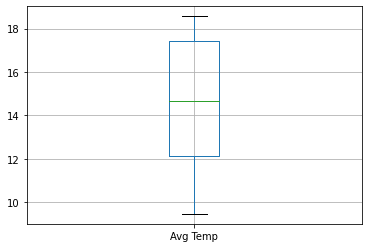

In [32]:
print(f'Avarage Season Growing Tempeture 2000 {df_2000_asgt.mean()}')
print(f'Avarage Season Growing Tempeture 2031 {df_2031_asgt.mean()}')

plt.title('ASGT 2000 vs ASGT 2031')
df_2000_asgt.boxplot(column=['avg_temp'])
plt.show()
df_2031_asgt.boxplot(column=['Avg Temp'])
plt.show()

# Working with Yarra Valley weather Data set

### Now we are goin to apply the same Feature engineering, process and model to the Yarra Valley dataset as the steps and process will be the same, we will skip until relevant information will appear

### Reading the dataset

#### Importing Libraries for read, work and ploth the data

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### The following dataset has been obtained by the nasa portal https://power.larc.nasa.gov/data-access-viewer/

In [34]:
dataset_yarra = pd.read_csv('Yarra_Valley1.csv')
dataset_yarra.head(5)

,LAT,LON,YEAR,MO,DY,PRECTOT,T2M_MIN,T2M_MAX
0,-37.78349,145.25601,1981,1,2,0.07,15.12,34.24
1,-37.78349,145.25601,1981,1,3,0.61,13.61,29.83
2,-37.78349,145.25601,1981,1,4,0.00,10.63,24.10
3,-37.78349,145.25601,1981,1,5,0.11,11.78,28.01
4,-37.78349,145.25601,1981,1,6,0.00,13.60,28.04


##### Renaming columns for better understanding and for and easy way to work with the dataset

In [35]:
dataset_yarra = dataset_yarra.rename(columns={'LAT':'latitude','LON':'longitude','YEAR':'year', 'MO':'month', 'DY':'day','PRECTOT':'precipitation', 'T2M_MAX':'max_temp', 'T2M_MIN':'min_temp'})
print(dataset_yarra.shape)
dataset_yarra.head(5)

(14243, 8)


,latitude,longitude,year,month,day,precipitation,min_temp,max_temp
0,-37.78349,145.25601,1981,1,2,0.07,15.12,34.24
1,-37.78349,145.25601,1981,1,3,0.61,13.61,29.83
2,-37.78349,145.25601,1981,1,4,0.00,10.63,24.10
3,-37.78349,145.25601,1981,1,5,0.11,11.78,28.01
4,-37.78349,145.25601,1981,1,6,0.00,13.60,28.04


##### Changing latitud and longitude for Region with value of Burgundy

In [36]:
dataset_yarra['region'] = dataset_yarra['latitude'] + dataset_yarra['longitude']
dataset_yarra.drop(['latitude', 'longitude'], axis=1, inplace=True)
dataset_yarra = dataset_yarra.replace(dataset_yarra['region'].values, 'Yarra Valley', regex=True,)
dataset_yarra.head(5)


,year,month,day,precipitation,min_temp,max_temp,region
0,1981,1,2,0.07,15.12,34.24,Yarra Valley
1,1981,1,3,0.61,13.61,29.83,Yarra Valley
2,1981,1,4,0.00,10.63,24.10,Yarra Valley
3,1981,1,5,0.11,11.78,28.01,Yarra Valley
4,1981,1,6,0.00,13.60,28.04,Yarra Valley


### Feature Engineering 

Firstly let's explore the dataset

In [37]:
dataset_yarra.describe()

,year,month,day,precipitation,min_temp,max_temp
count,14243.000000,14243.000000,14243.000000,14243.000000,14243.000000,14243.000000
mean,2000.001334,6.523555,15.729973,2.191875,8.897262,18.677670
std,11.253731,3.448569,8.799549,4.285753,3.875486,6.765479
min,1981.000000,1.000000,1.000000,0.000000,-1.420000,4.820000
25%,1990.000000,4.000000,8.000000,0.030000,5.940000,13.150000
50%,2000.000000,7.000000,16.000000,0.370000,8.410000,17.580000
75%,2010.000000,10.000000,23.000000,2.375000,11.370000,23.210000
max,2019.000000,12.000000,31.000000,66.980000,26.120000,42.740000


##### Checkin for null or na values

In [38]:
dataset_yarra.isna().any()

year             False
month            False
day              False
precipitation    False
min_temp         False
max_temp         False
region           False
dtype: bool

In [39]:
dataset_yarra.isnull().any()

year             False
month            False
day              False
precipitation    False
min_temp         False
max_temp         False
region           False
dtype: bool

### Set up a Datetime

The algorithm that we will try in this document works with *time series*, thus let's create a feature date under the time series type by using year, month and day columns 

In [40]:
dataset_yarra['date'] = pd.to_datetime(dataset_yarra[['year', 'month', 'day']])
cols = list(dataset_yarra.columns)
cols = [cols[-1]] + cols[:-1]

dataset_yarra = dataset_yarra[cols]

dataset_yarra

,date,year,month,day,precipitation,min_temp,max_temp,region
0,1981-01-02,1981,1,2,0.07,15.12,34.24,Yarra Valley
1,1981-01-03,1981,1,3,0.61,13.61,29.83,Yarra Valley
2,1981-01-04,1981,1,4,0.00,10.63,24.10,Yarra Valley
3,1981-01-05,1981,1,5,0.11,11.78,28.01,Yarra Valley
4,1981-01-06,1981,1,6,0.00,13.60,28.04,Yarra Valley
...,...,...,...,...,...,...,...,...
14238,2019-12-27,2019,12,27,0.03,10.12,33.23,Yarra Valley
14239,2019-12-28,2019,12,28,0.03,18.06,33.09,Yarra Valley
14240,2019-12-29,2019,12,29,0.03,18.31,37.81,Yarra Valley
14241,2019-12-30,2019,12,30,0.94,21.45,40.30,Yarra Valley


#### Create and Average Temperature feature

As we want to predict the the ASGT (Average Season Growing Temperature) we want to work the average temperatures, therefore let's create a avg_temp feature, this is the average temperature per each day

In [41]:
col = dataset_yarra.loc[:, ('max_temp','min_temp')]
dataset_yarra['avg_temp'] = col.mean(axis=1)
dataset_yarra.head(5)

,date,year,month,day,precipitation,min_temp,max_temp,region,avg_temp
0,1981-01-02,1981,1,2,0.07,15.12,34.24,Yarra Valley,24.680
1,1981-01-03,1981,1,3,0.61,13.61,29.83,Yarra Valley,21.720
2,1981-01-04,1981,1,4,0.00,10.63,24.10,Yarra Valley,17.365
3,1981-01-05,1981,1,5,0.11,11.78,28.01,Yarra Valley,19.895
4,1981-01-06,1981,1,6,0.00,13.60,28.04,Yarra Valley,20.820


### Dropping unnecesary columns 
- We will drop year, month and day columns as we have extracted that information to create or date column. 
- Drooping latitud and longitude as they are always the same values because we are talking about ame place, Burgundy
- Dropping precipitation as we are working with average temperture and Datetime
- Dropping min_temp and max_temp as we already got the average

In [42]:
#dataset.drop(['latitude','longitude','precipitation','year','month','day'], axis='columns', inplace=True)
dataset_yarra.drop(['precipitation','year','month','day','min_temp','max_temp'], axis='columns', inplace=True)

dataset_yarra.head(5)

,date,region,avg_temp
0,1981-01-02,Yarra Valley,24.680
1,1981-01-03,Yarra Valley,21.720
2,1981-01-04,Yarra Valley,17.365
3,1981-01-05,Yarra Valley,19.895
4,1981-01-06,Yarra Valley,20.820


### Grouping by average per month with DateTime  monthly frequency

The following block of code will group by the average temperature of each month in our data. ARIMA model works better when index is set as datetime with a given frequency, thus, we also make our index equals to the date feature and give it a monthly frequency

In [43]:
dataset_yarra = dataset_yarra.groupby([dataset_yarra.date.dt.year, dataset_yarra.date.dt.month], as_index=False).agg(
     {'date':'first','avg_temp':'mean'})


dataset_yarra.date = pd.date_range('1981-01-02', '2020-01-01', freq='M' )
dataset_yarra.index = pd.to_datetime(dataset_yarra.date)

dataset_yarra.drop('date', axis=1, inplace=True)
dataset_yarra.index.freq = 'M'
dataset_yarra.head(10)

,avg_temp
date,
1981-01-31,22.684833
1981-02-28,22.177143
1981-03-31,17.125806
1981-04-30,15.520500
1981-05-31,11.276935
1981-06-30,7.726500
1981-07-31,7.208387
1981-08-31,7.821290
1981-09-30,10.867333


### Looking for Stationarity

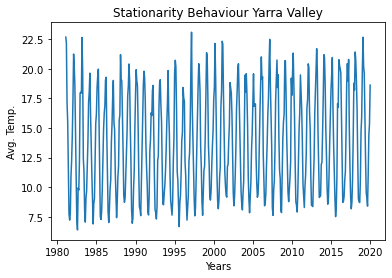

In [44]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Years')
ax1.set_ylabel('Avg. Temp.')
ax1.set_title('Stationarity Behaviour Yarra Valley')
ax1.plot(dataset_yarra.index, 'avg_temp', data = dataset_yarra);

In the previos plot, we do see how our Yarra data also behaves in similar way with the passing of the time with bigger ranges between min_temp and max_temp.
#### Moving Average and ADF
We already discussed about the meaning of the following concepts when we applied them to the Burgundy dataset and the stationarity_check Fuction for the graph and ADF test is already defined above 
#### Our p-values is lower than 0.05 meaning that no transformation is needed and our data is also Stationary

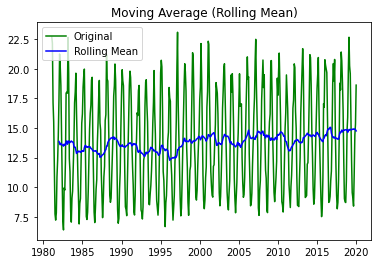

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-2.927774083655398, 0.04221226898162313, 14, 453, {'1%': -3.444868194858831, '5%': -2.867941416548597, '10%': -2.5701797149735146}, 1436.234950423167)
df_output: 
 ADF-Test                        -2.927774
P-value                          0.042212
#Lags Used                      14.000000
Number of Observations Used    453.000000
dtype: float64
ADF-Test                        -2.927774
P-value                          0.042212
#Lags Used                      14.000000
Number of Observations Used    453.000000
Critical Value (1%)             -3.444868
Critical Value (5%)             -2.867941
Critical Value (10%)            -2.570180
dtype: float64


In [45]:
stationarity_check(dataset_yarra.avg_temp)

##### Autocorrelation Plotand  Partial Autocorrelation plot for Yarra Valley Data

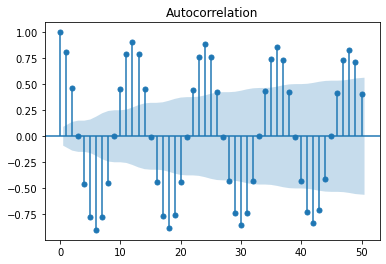

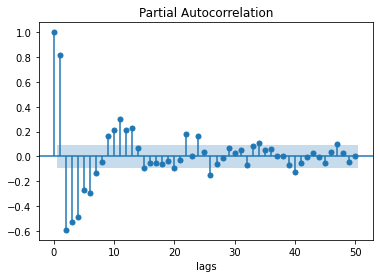

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

plot_acf(dataset['avg_temp'], lags=50)
plot_pacf(dataset['avg_temp'], lags=50)
plt.xlabel('lags')
plt.show()

##### Now that we corroborated that we have Stationarity data we can apply ARIMA model

### ARIMA Model and Selecting the model for Yarra Valley dataset
In this case the auto_arima function throws  arima p,d,q valuses of (5,0,1)

In [47]:
from pmdarima import auto_arima

In [48]:
stepwise_fit = auto_arima(dataset_yarra['avg_temp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  468
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -805.474
Date:                Thu, 06 May 2021   AIC                           1626.947
Time:                        19:54:20   BIC                           1660.135
Sample:                             0   HQIC                          1640.006
                                - 468                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      8.3228      1.446      5.756      0.000       5.489      11.157
ar.L1          0.9982      0.159      6.298      0.000       0.688       1.309
ar.L2         -0.1898      0.135     -1.406      0.160      -0.454       0.075
ar.L3         -0.0983      0.060     -1.643      0.100      -0.215       0.019
ar.L4         -0.1679      0.066     -2.556      0.011      -0.297      -0.039
ar.L5         -0.1444      0.091     -1.581      0.114      -0.323       0.035
ma.L1         -0.3249      0.165     -1.968      0.049      -0.648      -0.001
sigma2         1.7850      0.112     15.964      0.000       1.566       2.004
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 6.63
Prob(Q):                              0.83   Prob(JB):                         0.04
Heteroskedasticity (H):               1.00   Skew:                             0.22
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Thank to the auto_arima function we could ge our order equetion(2,0,2) to fit in our ARIMA model

In [49]:
from statsmodels.tsa.arima_model import ARIMA

### Split data into train and test set

Next we do a train-test split taking everything but 47 observations for taining which represents 90% of the dataset the rest 10% is for testing. This decision is made due to weather it is always hard to forecast.  

In [50]:
print(dataset_yarra.shape)
train=dataset_yarra.iloc[:-47]
test=dataset_yarra.iloc[-47:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(468, 1)
(421, 1) (47, 1)
avg_temp    19.988793
Name: 2016-02-29 00:00:00, dtype: float64 avg_temp    18.625323
Name: 2019-12-31 00:00:00, dtype: float64


##### Plotting how the results of the model fit in the actual data

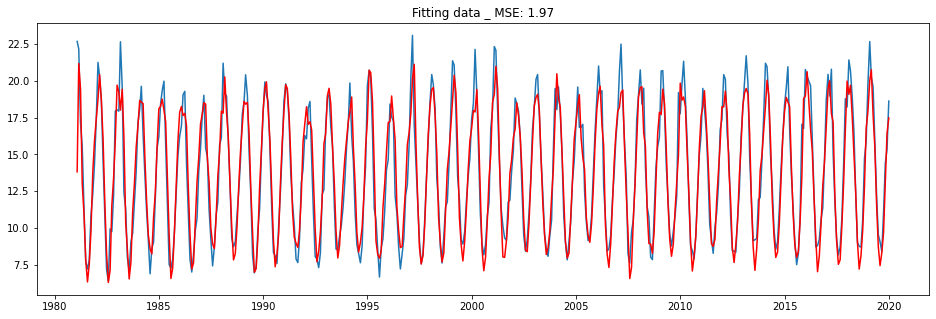

In [51]:
model = ARIMA(dataset_yarra.avg_temp, order=(5,0,1))  
results = model.fit()

plt.figure(figsize=(16,5))
plt.plot(dataset_yarra['avg_temp'])
plt.plot(results.fittedvalues, color='red')
#results.fittedvalues.plot(label = 'Fitted Values', legend=True)
#dataset['avg_temp'].plot(legend=True)

plt.title('Fitting data _ MSE: %.2f'% (((results.fittedvalues-dataset_yarra.avg_temp)**2).mean()))
plt.show()



##### Mean Square Error MSE
MSE is the sum of squared distances between our target variable and predicted values.
In our previous plot we can appreciate how the model fit in our data avoiding peaks with a MSE
of 1.97. Apparently the model fit better with Yarra Valley data

##### Predicting  our model and compare against test set Yarra Valey dataset

Test average Temperature 14.463022446983192
Prediction average Temperature  13.711208558710142


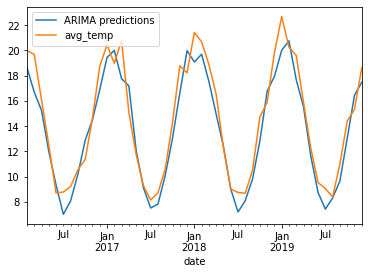

In [52]:
start=len(train)
end= len(train)+len(test)-1
pred = results.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['avg_temp'].plot(legend=True)
print(f'Test average Temperature {test["avg_temp"].mean()}')
print(f'Prediction average Temperature  {pred.mean()}')

##### Analyse accuracy
In the previous graph it seems the model behaves in a more constant way, let's analyse the accurecy of this representation.

In [53]:
from sklearn import metrics
from math import sqrt

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test['avg_temp'], pred)
mae = metrics.mean_absolute_error(test['avg_temp'], pred)
rmse= sqrt(metrics.mean_squared_error(test['avg_temp'],pred))


print(f'Mean Absolute Error {mae}')
print(f'Root Mean Squared Error {rmse}')
print(f'Mean Absolute Percentage Error {np.around(mape, decimals=2)}%')

Mean Absolute Error 1.1771538618724555
Root Mean Squared Error 1.3971646139319713
Mean Absolute Percentage Error 8.1%


### Our ARIMA model worked with a MAPE of 8.1%.This means that 8.1% of the predictions against test were wrong with values of  14.46° on the Test average Temperature and   13.713° Prediction average Temperature working with the Yarra Valley Dataset

##### Making future predictions for Yarra Valley
##### Make prediction for the next 10 years

In [54]:
predictions_yarra = results.predict('01/31/2020', '12/01/2031')

predictions_yarra = pd.DataFrame(predictions_yarra)
predictions_yarra = predictions_yarra.rename(columns={0:'Avg Temp'})
predictions_yarra['Date'] = predictions_yarra.index
predictions_yarra

,Avg Temp,Date
2020-01-31,19.149659,2020-01-31
2020-02-29,18.376763,2020-02-29
2020-03-31,16.564001,2020-03-31
2020-04-30,14.108549,2020-04-30
2020-05-31,11.536320,2020-05-31
...,...,...
2031-08-31,12.928687,2031-08-31
2031-09-30,13.181091,2031-09-30
2031-10-31,13.594108,2031-10-31
2031-11-30,14.054991,2031-11-30


##### Creating a 2031 dataset with predictions for yarra

In [55]:
df_2031_yarra = predictions_yarra[predictions_yarra.Date.dt.year == 2031]
df_2031_yarra

,Avg Temp,Date
2031-01-31,14.793041,2031-01-31
2031-02-28,14.767536,2031-02-28
2031-03-31,14.491726,2031-03-31
2031-04-30,14.044444,2031-04-30
2031-05-31,13.547732,2031-05-31
2031-06-30,13.133625,2031-06-30
2031-07-31,12.909135,2031-07-31
2031-08-31,12.928687,2031-08-31
2031-09-30,13.181091,2031-09-30
2031-10-31,13.594108,2031-10-31


##### Eliminate months that do not belong to the ASGT
As now we are studying a region that is in the Southern Hemisphere the ASGT is from October to April, therefore, we need to eliminate from May to September

In [56]:
may = df_2031_yarra[df_2031_yarra.Date.dt.month == 5].index
jun = df_2031_yarra[df_2031_yarra.Date.dt.month == 6].index
jul = df_2031_yarra[df_2031_yarra.Date.dt.month == 7].index
ago = df_2031_yarra[df_2031_yarra.Date.dt.month == 8].index
sep = df_2031_yarra[df_2031_yarra.Date.dt.month == 9].index

df_2031_yarra.drop(may, inplace=True)
df_2031_yarra.drop(jun, inplace=True)
df_2031_yarra.drop(jul, inplace=True)
df_2031_yarra.drop(ago, inplace=True)
df_2031_yarra.drop(sep, inplace=True)

df_2031_asgt_yarra = df_2031

df_2031_asgt_yarra

,Avg Temp,Date
2031-04-30,9.462622,2031-04-30
2031-05-31,13.845272,2031-05-31
2031-06-30,17.177017,2031-06-30
2031-07-31,18.564745,2031-07-31
2031-08-31,17.636472,2031-08-31
2031-09-30,14.641051,2031-09-30
2031-10-31,10.381457,2031-10-31


Avarage Season Growing Tempeture 2031 Avg Temp    14.529805
dtype: float64


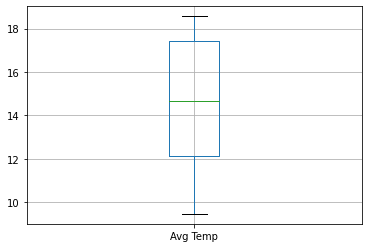

In [57]:
print(f'Avarage Season Growing Tempeture 2031 {df_2031_asgt.mean()}')
#pred.plot(legend=True)
df_2031_asgt_yarra.boxplot(column=['Avg Temp'])
plt.show()

### Calculating the ASGT of the year 2000

According to our reserch this was the last best year for Burgundy, Yes Burgundy, and this is because remember that Burgundy was the best region for Pinot Noir production in 2000 

In [58]:
df_2000_burgundy = dataset[dataset.date.dt.year == 2000]

df_2000_burgundy

,avg_temp,date
date,,
2000-01-31,0.913710,2000-01-31
2000-02-29,4.297069,2000-02-29
2000-03-31,5.397903,2000-03-31
2000-04-30,8.969667,2000-04-30
2000-05-31,14.356935,2000-05-31
2000-06-30,16.605333,2000-06-30
2000-07-31,16.125161,2000-07-31
2000-08-31,19.164355,2000-08-31
2000-09-30,16.122833,2000-09-30


In [60]:
jan = df_2000_burgundy[df_2000_burgundy.date.dt.month == 1].index
feb = df_2000_burgundy[df_2000_burgundy.date.dt.month == 2].index
mar = df_2000_burgundy[df_2000_burgundy.date.dt.month == 3].index
nov = df_2000_burgundy[df_2000_burgundy.date.dt.month == 11].index
dic = df_2000_burgundy[df_2000_burgundy.date.dt.month == 12].index

df_2000_burgundy.drop(jan, inplace=True)
df_2000_burgundy.drop(feb, inplace=True)
df_2000_burgundy.drop(mar, inplace=True)
df_2000_burgundy.drop(nov, inplace=True)
df_2000_burgundy.drop(dic, inplace=True)

df_2000_asgt_burgundy = df_2000_burgundy

df_2000_asgt_burgundy

,avg_temp,date
date,,
2000-04-30,8.969667,2000-04-30
2000-05-31,14.356935,2000-05-31
2000-06-30,16.605333,2000-06-30
2000-07-31,16.125161,2000-07-31
2000-08-31,19.164355,2000-08-31
2000-09-30,16.122833,2000-09-30
2000-10-31,10.802258,2000-10-31


##### Compere the prediction for 2031 of Yarra Valley against 2000 of Burgundy

Avarage Season Growing Tempeture 2000 avg_temp    14.592363
dtype: float64
Avarage Season Growing Tempeture 2031 Avg Temp    14.529805
dtype: float64


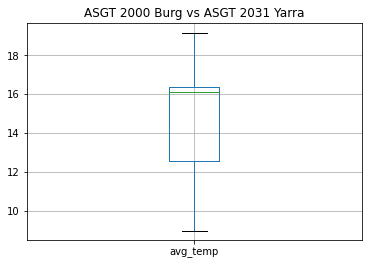

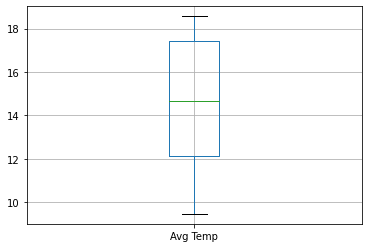

In [62]:
print(f'Avarage Season Growing Tempeture 2000 {df_2000_asgt_burgundy.mean()}')
print(f'Avarage Season Growing Tempeture 2031 {df_2031_asgt_yarra.mean()}')

plt.title('ASGT 2000 Burg vs ASGT 2031 Yarra')
df_2000_asgt_burgundy.boxplot(column=['avg_temp'])
plt.show()
df_2031_asgt_yarra.boxplot(column=['Avg Temp'])
plt.show()

*References and conclucion regarding this work in the documentation*